## Libraries

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [3]:
X,Y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
Y.shape

(70000,)

In [5]:
Y = Y.astype(np.int8)
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(Y == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


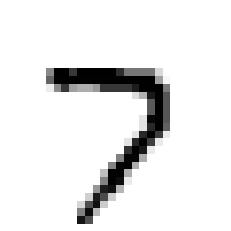

In [6]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X[36003])

In [7]:
Y[36003]

7

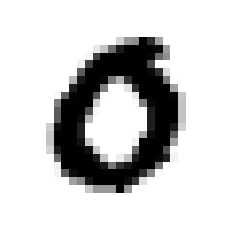

0


In [8]:
plot_digit(X[8000])
print(Y[8000])

In [9]:
X_96 = X[np.any([Y == 9 , Y == 6], axis = 0)]
Y_96 = Y[np.any([Y == 9 ,Y == 6], axis = 0)]

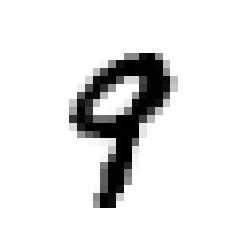

9


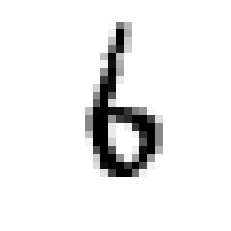

6


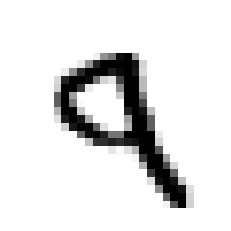

9


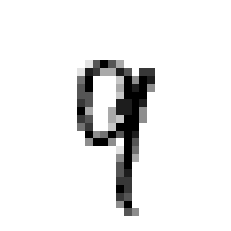

9


In [10]:
plot_digit(X_96[8000])
print(Y_96[8000])
plot_digit(X_96[9355])
print(Y_96[9355])
plot_digit(X_96[877])
print(Y_96[877])
plot_digit(X_96[144])
print(Y_96[144])

In [11]:
print(X_96.shape)
print(Y_96.shape)

(13834, 784)
(13834,)


In [12]:
print("number of 6:", np.count_nonzero(Y_96 == 6))
print("number of 9:", np.count_nonzero(Y_96 == 9))

number of 6: 6876
number of 9: 6958


In [42]:
shuffle_index = np.random.permutation(X_96.shape[0])
X_96_shuffled, Y_96_shuffled = X_96[shuffle_index], Y_96[shuffle_index]

train_proportion = 0.8
train_test_cut = int(len(X_96)*train_proportion)

X_train, X_test, y_train, y_test = \
    X_96_shuffled[:train_test_cut], \
    X_96_shuffled[train_test_cut:], \
    Y_96_shuffled[:train_test_cut], \
    Y_96_shuffled[train_test_cut:]
    
print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is (11067, 784)
Shape of X_test is (2767, 784)
Shape of y_train is (11067,)
Shape of y_test is (2767,)


In [43]:
np.count_nonzero(Y_96 == 6) / np.count_nonzero(Y_96 == 9)

0.9882150043115838

In [44]:
print(np.count_nonzero(y_train == 6) / np.count_nonzero(y_train == 9))
print(np.count_nonzero(y_test == 6) / np.count_nonzero(y_test == 9))

0.9936948297604036
0.9665955934612651


In [45]:
X_train_normalised = X_train/255.0
X_test_normalised = X_test/255.0

In [46]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])
X_test_tr = X_test_normalised.transpose()
y_test_tr = y_test.reshape(1,y_test.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)
print(X_test_tr.shape)
print(y_test_tr.shape)

dim_train = X_train_tr.shape[1]
dim_test = X_test_tr.shape[1]

print("The training dataset has dimensions equal to", dim_train)
print("The test set has dimensions equal to", dim_test)

(784, 11067)
(1, 11067)
(784, 2767)
(1, 2767)
The training dataset has dimensions equal to 11067
The test set has dimensions equal to 2767


In [47]:
y_train_tr = y_train_tr.astype(np.int8)
y_test_tr = y_test_tr.astype(np.int8)
row, col = y_train_tr.shape
row1, col1 = y_test_tr.shape
for i in range(col):
    if (y_train_tr[0,i] == 6):
        y_train_shifted[0,i] = y_train_tr[0,i] - 6
    elif (y_train_tr[0,i] == 9):
        y_train_shifted[0,i] = y_train_tr[0,i] - 8
    else:
        print("Error")

for i in range(col1):
    if (y_test_tr[0,i] == 6):
        y_test_shifted[0,i] = y_test_tr[0,i] - 6
    elif (y_test_tr[0,i] == 9):
        y_test_shifted[0,i] = y_test_tr[0,i] - 8
    else:
        print("Error")

#y_train_shifted = y_train_tr - 1
#y_test_shifted = y_test_tr - 1

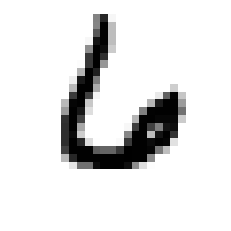

[0]


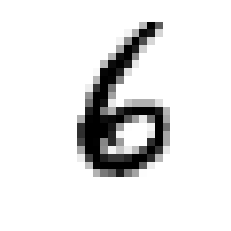

[0]


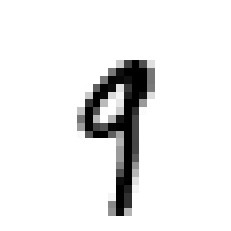

[1]


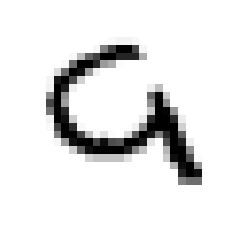

[1]


In [48]:
plot_digit(X_train_tr[:,1005])
print(y_train_shifted[:,1005])
plot_digit(X_train_tr[:,1432])
print(y_train_shifted[:,1432])
plot_digit(X_train_tr[:,456])
print(y_train_shifted[:,456])
plot_digit(X_train_tr[:,567])
print(y_train_shifted[:,567])

Xtrain = X_train_tr
ytrain = y_train_shifted
Xtest = X_test_tr
ytest = y_test_shifted

In [23]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [24]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))
    
    return w,b

In [25]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))
    
    dw = 1.0/m*np.dot(X, (A-Y).T)
    db = 1.0/m*np.sum(A-Y)
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    
    grads = {"dw": dw, 
             "db":db}
    
    return grads, cost

In [26]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
        
    return params, grads, costs

In [30]:
def predict (w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid (np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = '1'
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = '0'
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction

In [49]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    return d
    

In [57]:
#Xtrain = Xtrain.astype(np.int8)
#ytrain = ytrain.astype(np.int8) 
#Xtest = Xtest.astype(np.int8)
#ytest = ytest.astype(np.int8)
d = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 4000, 
           learning_rate = 0.05, 
           print_cost = True)

Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.072545
Cost (iteration 200) = 0.046560
Cost (iteration 300) = 0.036599
Cost (iteration 400) = 0.031150
Cost (iteration 500) = 0.027647
Cost (iteration 600) = 0.025173
Cost (iteration 700) = 0.023315
Cost (iteration 800) = 0.021859
Cost (iteration 900) = 0.020679
Cost (iteration 1000) = 0.019699
Cost (iteration 1100) = 0.018869
Cost (iteration 1200) = 0.018154
Cost (iteration 1300) = 0.017530
Cost (iteration 1400) = 0.016979
Cost (iteration 1500) = 0.016488
Cost (iteration 1600) = 0.016046
Cost (iteration 1700) = 0.015646
Cost (iteration 1800) = 0.015282
Cost (iteration 1900) = 0.014948
Cost (iteration 2000) = 0.014640
Cost (iteration 2100) = 0.014355
Cost (iteration 2200) = 0.014089
Cost (iteration 2300) = 0.013842
Cost (iteration 2400) = 0.013611
Cost (iteration 2500) = 0.013393
Cost (iteration 2600) = 0.013188
Cost (iteration 2700) = 0.012995
Cost (iteration 2800) = 0.012812
Cost (iteration 2900) = 0.012638
Cost (iteration 3000) 

In [51]:
ypred = d["Y_prediction_test"]
ypred_ravel = ypred.ravel()
ytest_ravel = ytest.ravel()
ypred_ravel_tr = ypred_ravel.reshape(1,ypred_ravel.shape[0])
dim_pred = ypred_ravel_tr.shape[1]
ytest_ravel_tr = ytest_ravel.reshape(1,ytest_ravel.shape[0])
dim_test = ytest_ravel_tr.shape[1]

def confusion(ytest_ravel, ypred_ravel):
    TP, TN, FP, FN = 0,0,0,0
    for i in range(dim_pred):
        if((ytest_ravel[i]==0) & (ypred_ravel[i] == 0)):
            TP = TP+1
        elif((ytest_ravel[i]==1) & (ypred_ravel[i] == 1)):
            TN = TN+1
        elif((ytest_ravel[i]==0) & (ypred_ravel[i] == 1)):
            FP = FP+1
        elif((ytest_ravel[i]==1) & (ypred_ravel[i] == 0)):
            FN = FN+1
        else:
            Print("Error")
    Array= ([[TP, FP], [FN , TN]])
    print(Array)
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Recall = TP / (TP + FN)
    Precision = TP / (TP + FP)
    return print(Accuracy,  Recall, Precision)
    
c=confusion(ytest_ravel, ypred_ravel)

from sklearn.metrics import confusion_matrix

confusion_matrix (ytest_ravel, ypred_ravel)

[[1358, 2], [4, 1403]]
0.9978315865558366 0.9970631424375918 0.9985294117647059


array([[1358,    2],
       [   4, 1403]], dtype=int64)

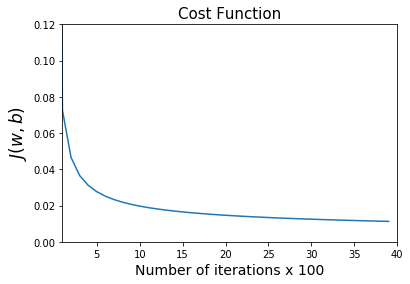

In [52]:
plt.plot(d["costs"])
plt.xlim([1,40])
plt.ylim([0,0.12])
plt.title("Cost Function",fontsize = 15)
plt.xlabel("Number of iterations x 100", fontsize = 14)
plt.ylabel("$J(w,b)$", fontsize = 17)
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [54]:
XX = Xtrain.T
YY = ytrain.T.ravel()

logistic.fit(XX,YY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
logistic.score(XX,YY)

0.9997289238275956

In [56]:
sum(logistic.predict(XX) == YY) / len(XX)

0.9997289238275956